## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(11)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3079104, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3079104, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079104 entries, 0 to 3079103
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3079104.0    344.335326   
Codigo OMM                                  3078384.0  85360.405252   
Day                                         3079104.0     15.529900   
H(UTC)                                      3079104.0     11.500000   
Latitude                                    3079104.0    -15.872451   
Longitude                                   3079104.0    -47.751563   
Month                                       3079104.0     11.000000   
PRECIPITACAO (mm)                           2783906.0      0.193235   
PRESSAO ATMOSFERICA (hPa)                   2835215.0    964.239760   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2834429.0    964.542016   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2834435.0    963.947762   
RADIACAO GLOBAL (KJ/M2)                     1543808.0   1506.494747   
TEMPERATURA DO AR (C)                       2847796.0     24.506084   
TEMPERATURA DO PONTO DE ORVALHO (C)         2823671.0     18.366369   
TEMPERATURA MAXIMA (C)                      2847597.0     25.138897   
TEMPERATURA MINIMA (C)                      2847568.0     23.907328   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2824432.0     18.908043   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2823077.0     17.845267   
UMIDADE RELATIVA DO AR (%)                  2828568.0     71.973659   
UMIDADE RELATIVA DO MAXIMA AR (%)           2827907.0     74.789889   
UMIDADE RELATIVA DO MINIMA AR (%)           2826059.0     69.046342   
VENTO VELOCIDADE                            2796510.0      2.312757   
VENTO, DIRECAO (graus)                      2777171.0    147.387514   
VENTO, RAJADA MAXIMA (m/s)                  2794095.0      5.443089   
Year                                        3079104.0   2010.757919   

                                                    std           min  \
Altitude(metros)                             288.182117      1.001000   
Codigo OMM                                  2258.087450  81609.000000   
Day                                            8.656043      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.139415    -33.742297   
Longitude                                      6.939001    -72.786778   
Month                                          0.000000     11.000000   
PRECIPITACAO (mm)                              1.474184      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.870784    804.600000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.880680    805.600000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.864693    804.600000   
RADIACAO GLOBAL (KJ/M2)                     1185.168558      0.000000   
TEMPERATURA DO AR (C)                          4.831475     -9.200000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.677510    -24.000000   
TEMPERATURA MAXIMA (C)                         4.998051      0.500000   
TEMPERATURA MINIMA (C)                         4.667093     -6.900000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.595214    -20.900000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.793696    -34.800000   
UMIDADE RELATIVA DO AR (%)                    19.150174     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             18.277716      0.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.836265      0.000000   
VENTO VELOCIDADE                               1.818376      0.000000   
VENTO, DIRECAO (graus)                       100.834945      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     3.126792      0.000000   
Year                                           3.049364   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86732.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     11   
1             185.0     81963.0    1       1 -9.358353 -69.926257     11   
2             185.0     81963.0    1       2 -9.358353 -69.926257     11   
3             185.0     81963.0    1       3 -9.358353 -69.926257     11   
4             185.0     81963.0    1       4 -9.358353 -69.926257     11   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      990.2                             990.2   
1                      991.3                             991.3   
2                      991.4                             991.6   
3                      991.1                             991.6   
4                      991.0                             991.1   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             989.1                      NaN   
1                             990.2                      NaN   
2                             991.2                      NaN   
3                             991.1                      NaN   
4                             990.9                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   22.4                                 21.2   
1                   22.0                                 21.1   
2                   21.7                                 20.9   
3                   21.8                                 21.0   
4                   21.7                                 20.9   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    23.1                    22.4   
1                    22.7                    22.0   
2                    22.0                    21.7   
3                    22.0                    21.7   
4                    21.8                    21.6   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        21.4   
1                                        21.4   
2                                        21.1   
3                                        21.2   
4                                        21.1   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.2                        93.0   
1                                        21.0                        94.0   
2                                        20.9                        95.0   
3                                        20.9                        95.0   
4                                        20.8                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               93.0                               90.0   
1                               94.0                               92.0   
2                               95.0                               94.0   
3                               96.0                               95.0   
4                               96.0                               95.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.0                   205.0                         1.7   
1                0.0                   128.0                         0.9   
2                0.0                   344.0                         0.9   
3                0.0                    57.0                         1.0   
4                0.2                   230.0                         1.0   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3079099               6.0     86618.0   30      19 -10.473959 -36.482051   
3079100               6.0     86618.0   30      20 -10.473959 -36.482051   
3079101               6.0     86618.0   30      21 -10.473959 -36.482051   
3079102               6.0     86618.0   30      22 -10.473959 -36.482051   
3079103               6.0     86618.0   30      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3079099     11  Brejo Grande-A421                0.0   
3079100     11  Brejo Grande-A421                0.0   
3079101     11  Brejo Grande-A421                0.0   
3079102     11  Brejo Grande-A421                0.0   
3079103     11  Brejo Grande-A421                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3079099                     1013.6                            1013.6   
3079100                     1014.0                            1014.0   
3079101                     1014.3                            1014.3   
3079102                     1014.8                            1014.8   
3079103                     1015.6                            1015.6   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3079099                            1013.4                 1622.298   
3079100                            1013.6                  588.852   
3079101                            1014.0                   47.587   
3079102                            1014.3                      NaN   
3079103                            1014.8                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3079099                   28.7                                 18.9   
3079100                   27.3                                 19.5   
3079101                   25.9                                 19.5   
3079102                   25.7                                 19.6   
3079103                   25.5                                 19.9   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3079099                    29.9                    28.4   
3079100                    28.9                    27.3   
3079101                    27.3                    25.2   
3079102                    26.0                    25.7   
3079103                    25.7                    25.4   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3079099                                        19.4   
3079100                                        19.9   
3079101                                        19.6   
3079102                                        19.7   
3079103                                        19.9   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3079099                                        17.9   
3079100                                        18.7   
3079101                                        18.7   
3079102                                        19.6   
3079103                                        19.6   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3079099                        55.0                               57.0   
3079100                        63.0                               63.0   
3079101                        68.0                               68.0   
3079102                        69.0                               69.0   
3079103                        71.0                               71.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3079099                               49.0                3.8   
3079100                               55.0                2.4   
3079101                               63.0                2.5   
3079102                               68.0                2.1   
3079103                               69.0                2.1   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3079099     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023383
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.587140
PRESSAO ATMOSFERICA (hPa)                      7.920778
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.946305
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.946110
RADIACAO GLOBAL (KJ/M2)                       49.861778
TEMPERATURA DO AR (C)                          7.512185
TEMPERATURA DO PONTO DE ORVALHO (C)            8.295693
TEMPERATURA MAXIMA (C)                         7.518648
TEMPERATURA MINIMA (C)                         7.519590
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     8

In [9]:
data.dropna().shape

(1447135, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1631969

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.251730
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.000130
TEMPERATURA DO PONTO DE ORVALHO (C)             0.035432
TEMPERATURA MAXIMA (C)                          0.000000
TEMPERATURA MINIMA (C)                          0.000747
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                    11
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             804.6
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      805.6
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      804.6
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -9.2
TEMPERATURA DO PONTO DE ORVALHO (C)                     -24
TEMPERATURA MAXIMA (C)                                  0.5
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    30
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                  11
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    93.8
PRESSAO ATMOSFERICA (hPa)                          1044.1
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.5
PRESSAO ATMOSFÉRICA MINIMA (hPa)                   1043.7
RADIACAO GLOBAL (KJ/M2)                           11586.5
TEMPERATURA DO AR (C)                                44.7
TEMPERATURA DO PONTO DE ORVALHO (C)                  41.2
TEMPERATURA MAXIMA (C)                               43.4
TEMPERATURA MINIMA (C)                               44.7
TEMPERATURA MÁ

# Matriz de correlação dos dados

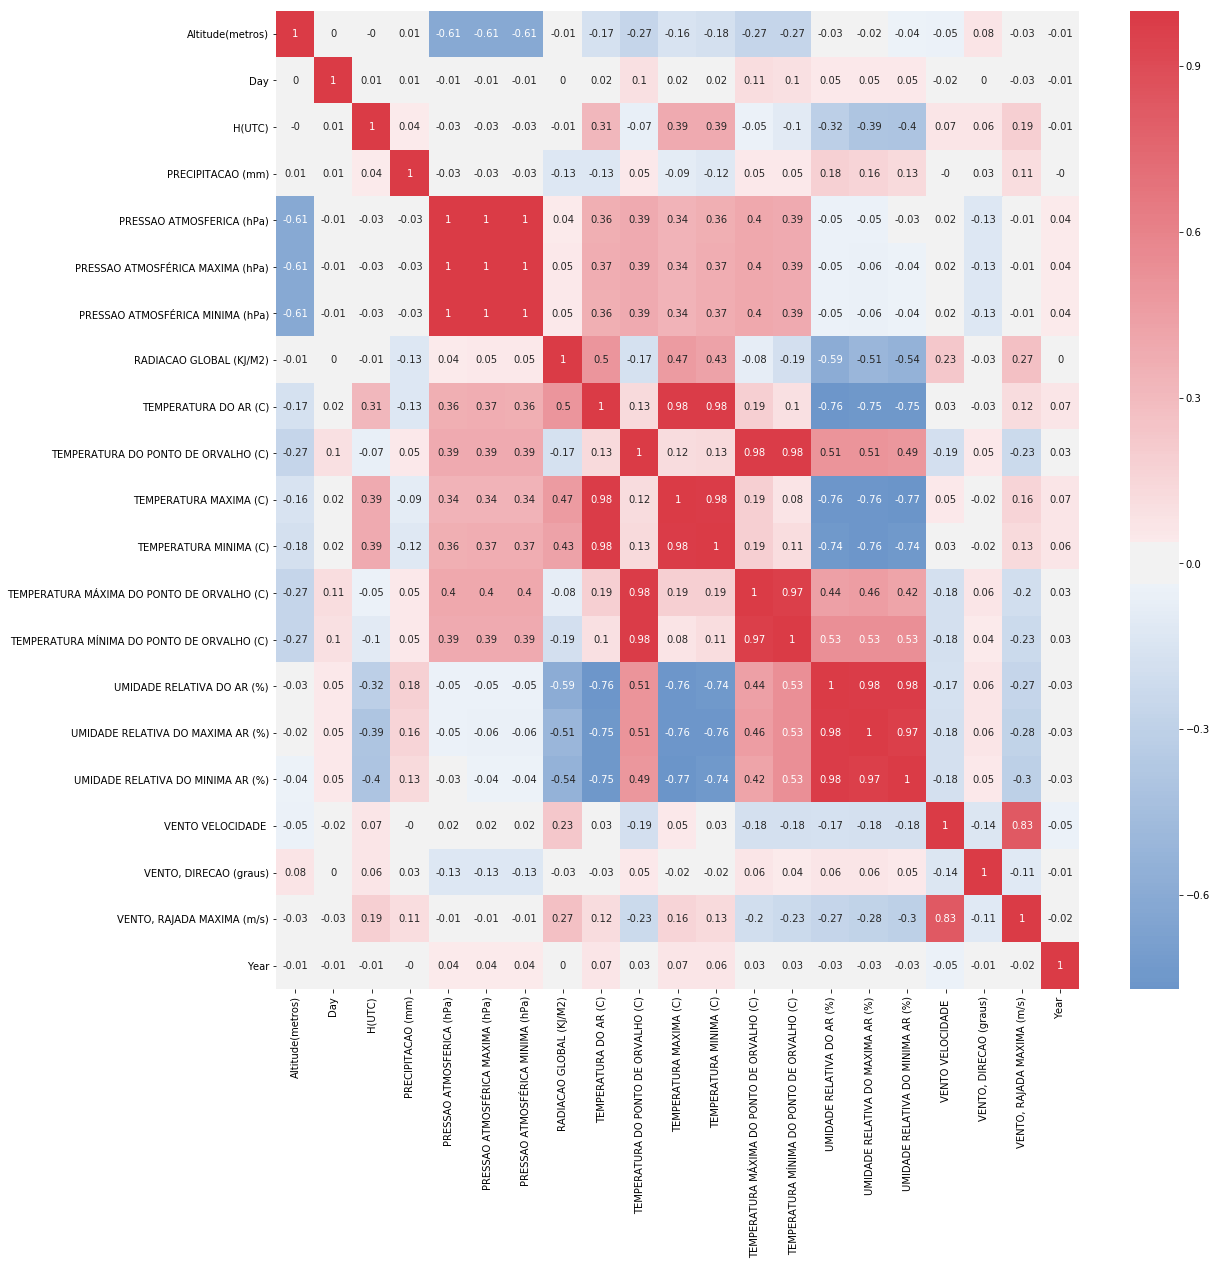

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [15]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [16]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [17]:
len(ur_list)

1

In [18]:
ur_list

['Parque Estadual Chandless-A102']

In [19]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    921
UMIDADE RELATIVA DO MINIMA AR (%)    921
UMIDADE RELATIVA DO AR (%)           921
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [20]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [21]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [22]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              8
Codigo OMM                                    8
Day                                           8
H(UTC)                                        8
Latitude                                      8
Longitude                                     8
Month                                         8
Nome                                          8
PRECIPITACAO (mm)                             8
PRESSAO ATMOSFERICA (hPa)                     8
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              8
PRESSAO ATMOSFÉRICA MINIMA (hPa)              8
RADIACAO GLOBAL (KJ/M2)                       1
TEMPERATURA DO AR (C)                         8
TEMPERATURA DO PONTO DE ORVALHO (C)           8
TEMPERATURA MAXIMA (C)                        8
TEMPERATURA MINIMA (C)                        8
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    8
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    8
UMIDADE RELATIVA DO AR (%)                    1
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [23]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [24]:
len(temp_max_list)

0

In [25]:
temp_max_list

[]

In [26]:
map_temp_max

#### nem uma estação


## Possiveis erros de temperatura minima

In [30]:
len(temp_min_list)

2

In [31]:
temp_min_list

['Goiânia-A002', 'Morro da Igreja (Bom Jardim da Serra)-A845']

In [32]:
map_temp_min

In [33]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 13 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 296 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [35]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 0 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [36]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
419416  Goiânia-A002                     4.9                    28.9   
419629  Goiânia-A002                     1.5                    21.8   
419692  Goiânia-A002                     4.0                    10.5   
419693  Goiânia-A002                     0.2                     8.1   
419694  Goiânia-A002                     0.9                    21.0   
419713  Goiânia-A002                    -3.1                    24.3   
419715  Goiânia-A002                    -4.3                    23.3   
419761  Goiânia-A002                    -2.2                    24.1   
419844  Goiânia-A002                    -6.9                    25.2   
424643  Goiânia-A002                    -3.4                    21.5   
424662  Goiânia-A002                     0.6                    22.2   
424711  Goiânia-A002                     3.8                    21.8   
425017  Goiânia-A002                    -0.6                    19.5   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
419416                   28.9  2008    2      16  
419629                   15.9  2008   11      13  
419692                    6.4  2008   14       4  
419693                    2.6  2008   14       5  
419694                   21.0  2008   14       6  
419713                   22.7  2008   15       1  
419715                    NaN  2008   15       3  
419761                   21.5  2008   17       1  
419844                   25.0  2008   20      12  
424643                   13.3  2015   10      11  
424662                   21.8  2015   11       6  
424711                   20.6  2015   13       7  
425017                   19.5  2015   26       1

In [38]:
df_temp = data.loc[lambda df: df.Nome ==temp_min_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  \
1252680  Morro da Igreja (Bom Jardim da Serra)-A845                     3.3   
1252681  Morro da Igreja (Bom Jardim da Serra)-A845                     3.5   
1252682  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1252683  Morro da Igreja (Bom Jardim da Serra)-A845                     2.3   
1252684  Morro da Igreja (Bom Jardim da Serra)-A845                     1.9   
1252685  Morro da Igreja (Bom Jardim da Serra)-A845                     3.2   
1252686  Morro da Igreja (Bom Jardim da Serra)-A845                     3.2   
1252687  Morro da Igreja (Bom Jardim da Serra)-A845                     4.2   
1252851  Morro da Igreja (Bom Jardim da Serra)-A845                     3.9   
1252852  Morro da Igreja (Bom Jardim da Serra)-A845                     3.9   
1252853  Morro da Igreja (Bom Jardim da Serra)-A845                     3.9   
1252854  Morro da Igreja (Bom Jardim da Serra)-A845                     3.4   
1252855  Morro da Igreja (Bom Jardim da Serra)-A845                     3.7   
1252856  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1252857  Morro da Igreja (Bom Jardim da Serra)-A845                     2.9   
1252858  Morro da Igreja (Bom Jardim da Serra)-A845                     3.8   
1252859  Morro da Igreja (Bom Jardim da Serra)-A845                     4.3   
1253118  Morro da Igreja (Bom Jardim da Serra)-A845                     4.5   
1253119  Morro da Igreja (Bom Jardim da Serra)-A845                     4.3   
1253120  Morro da Igreja (Bom Jardim da Serra)-A845                     4.1   
1253121  Morro da Igreja (Bom Jardim da Serra)-A845                     4.1   
1253122  Morro da Igreja (Bom Jardim da Serra)-A845                     4.3   
1253259  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1253584  Morro da Igreja (Bom Jardim da Serra)-A845                     3.9   
1253585  Morro da Igreja (Bom Jardim da Serra)-A845                     4.5   
1253590  Morro da Igreja (Bom Jardim da Serra)-A845                     4.9   
1253591  Morro da Igreja (Bom Jardim da Serra)-A845                     4.7   
1253592  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1253685  Morro da Igreja (Bom Jardim da Serra)-A845                     4.3   
1253686  Morro da Igreja (Bom Jardim da Serra)-A845                     4.0   
...                                             ...                     ...   
1258011  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258012  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258015  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258017  Morro da Igreja (Bom Jardim da Serra)-A845                    -5.3   
1258033  Morro da Igreja (Bom Jardim da Serra)-A845                    -6.2   
1258039  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258040  Morro da Igreja (Bom Jardim da Serra)-A845                    -6.2   
1258043  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258057  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258059  Morro da Igreja (Bom Jardim da Serra)-A845                     1.0   
1258060  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258061  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258063  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258064  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258065  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258066  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258067  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258068  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258069  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1258157  Morro da 

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [39]:
for name in ['Goiânia-A002']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

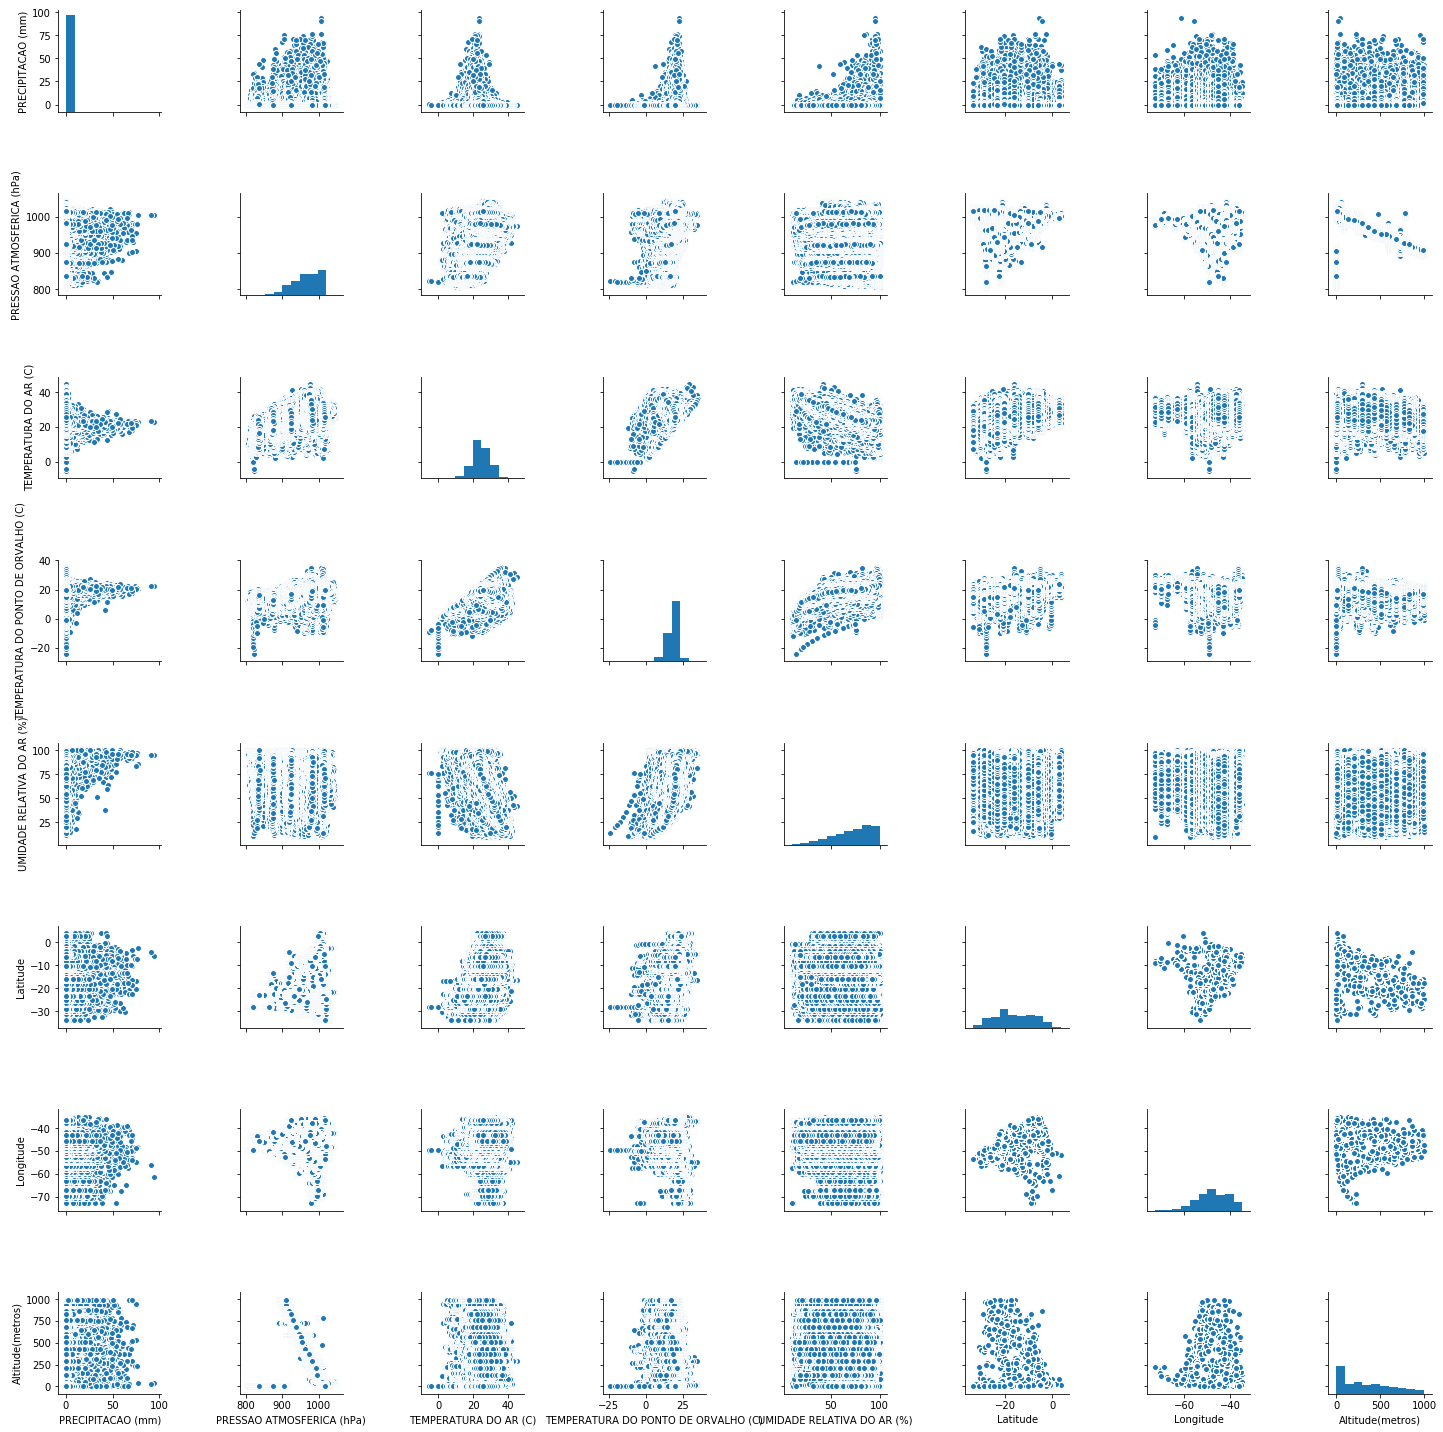

In [40]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

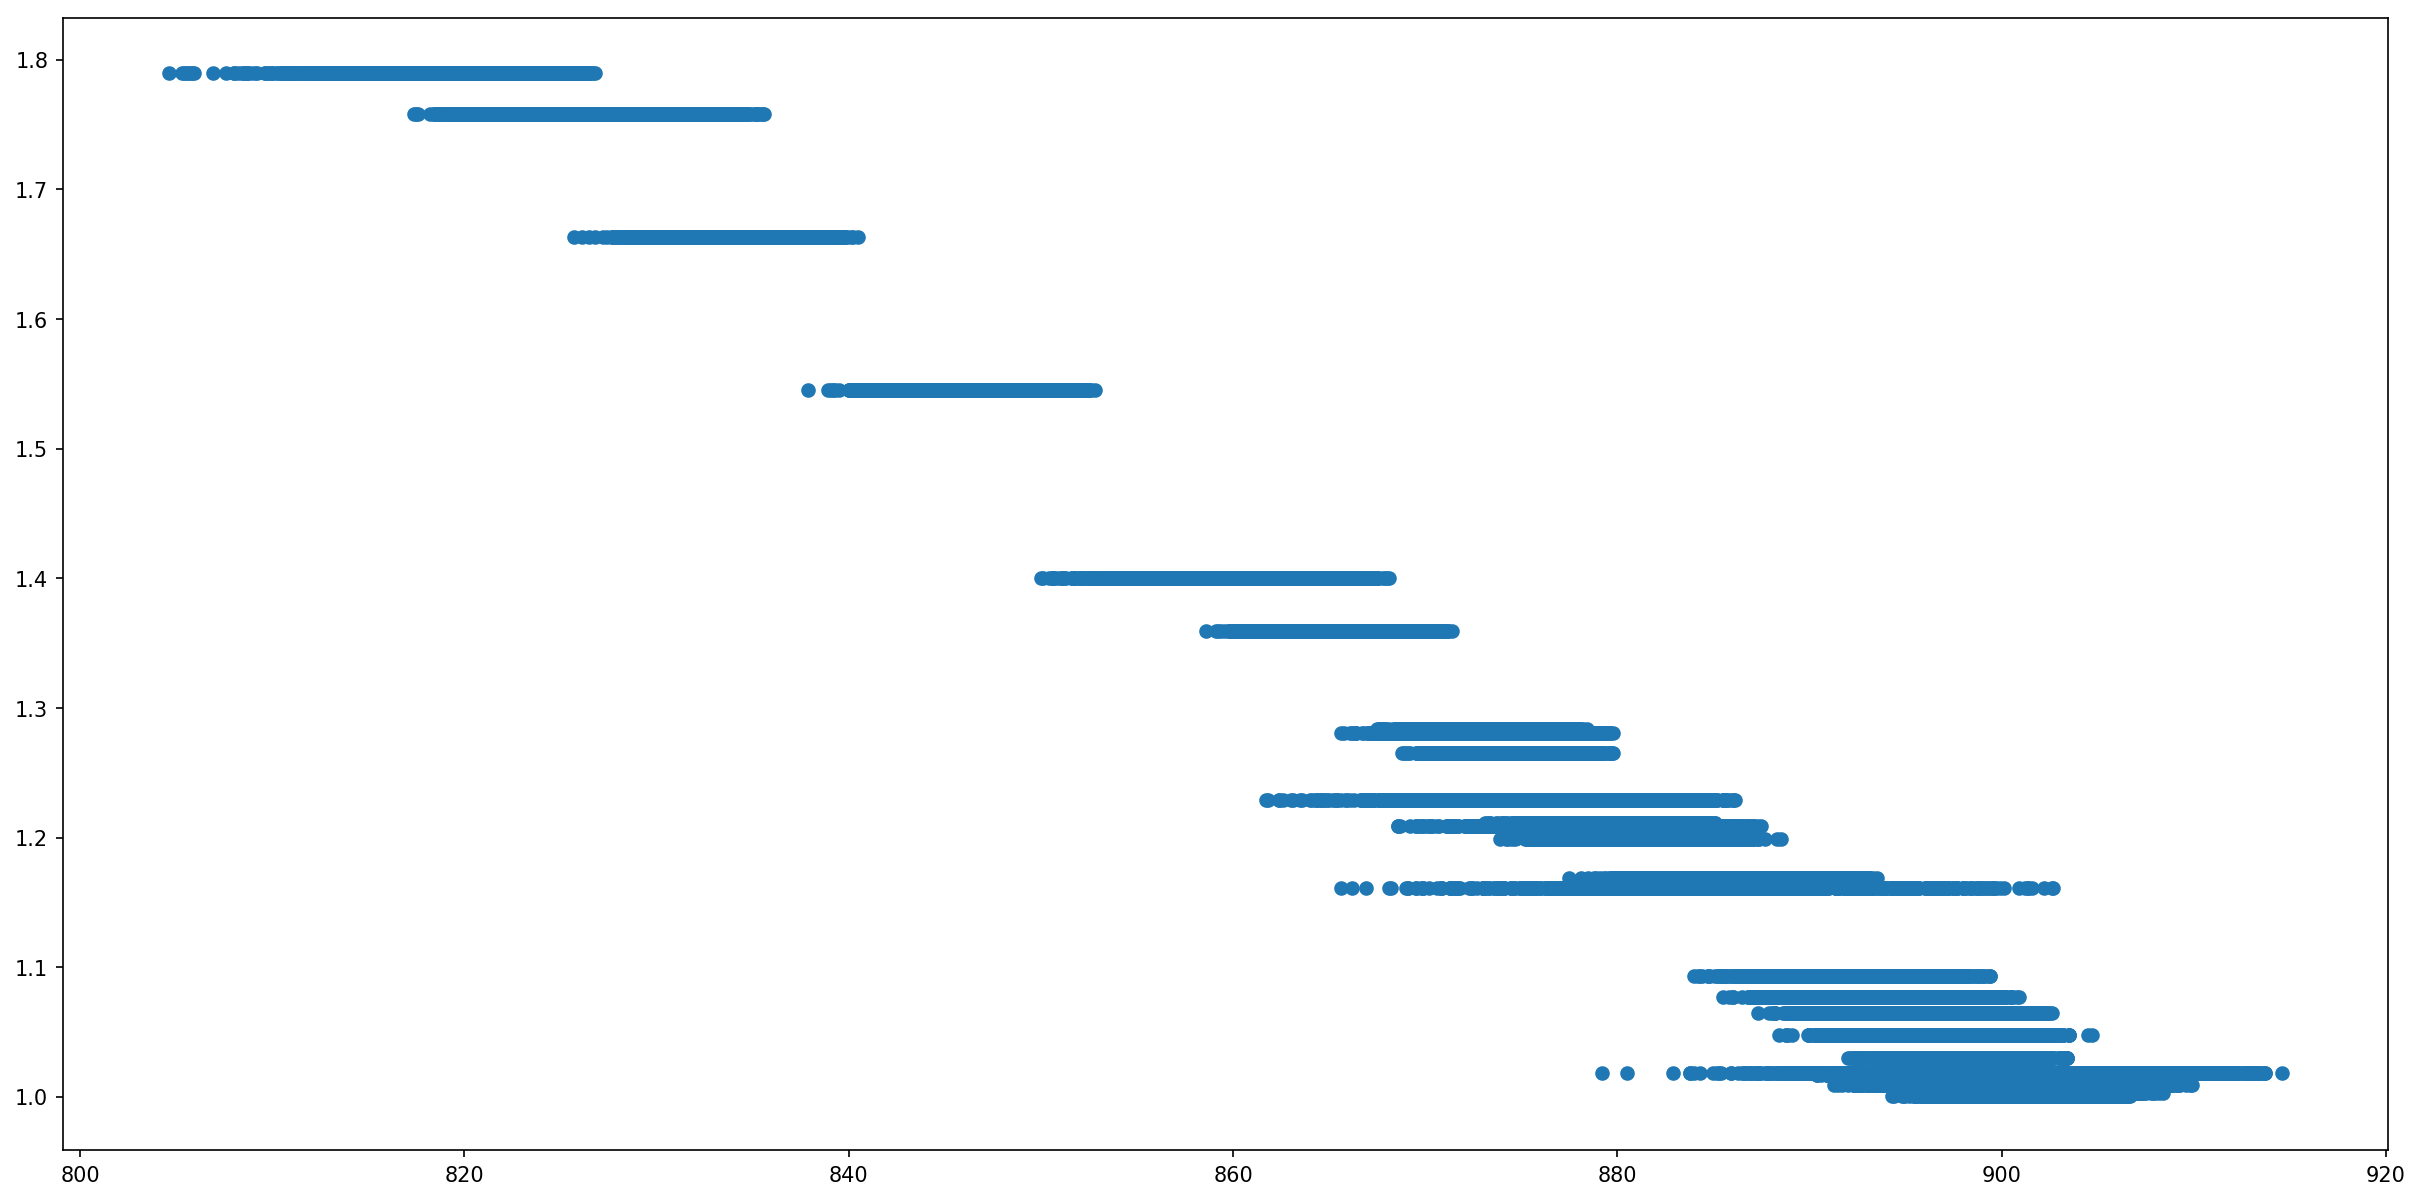

In [41]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['Altitude(metros)'])


In [42]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
389688             1.161     86715.0    1       0 -15.789343 -47.925756   
389689             1.161     86715.0    1       1 -15.789343 -47.925756   
389690             1.161     86715.0    1       2 -15.789343 -47.925756   
389691             1.161     86715.0    1       3 -15.789343 -47.925756   
389692             1.161     86715.0    1       4 -15.789343 -47.925756   
389693             1.161     86715.0    1       5 -15.789343 -47.925756   
389694             1.161     86715.0    1       6 -15.789343 -47.925756   
389695             1.161     86715.0    1       7 -15.789343 -47.925756   
389696             1.161     86715.0    1       8 -15.789343 -47.925756   
389697             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
389688     11  Brasília-A001                0.2                      886.3   
389689     11  Brasília-A001                0.0                      886.9   
389690     11  Brasília-A001                0.0                      887.0   
389691     11  Brasília-A001                0.0                      886.7   
389692     11  Brasília-A001                0.0                      886.2   
389693     11  Brasília-A001                0.0                      885.5   
389694     11  Brasília-A001                0.0                      885.4   
389695     11  Brasília-A001                0.0                      885.2   
389696     11  Brasília-A001                0.0                      885.5   
389697     11  Brasília-A001                0.0                      886.0   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
389688                             886.3                             886.0   
389689                             886.9                             886.3   
389690                             887.3                             886.9   
389691                             887.0                             886.7   
389692                             886.7                             886.2   
389693                             886.2                             885.5   
389694                             885.6                             885.4   
389695                             885.4                             885.1   
389696                             885.5                             885.2   
389697                             886.0                             885.5   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
389688                      NaN                   18.0   
389689                      NaN                   17.9   
389690                      NaN                   18.1   
389691                      NaN                   18.1   
389692                      NaN                   17.8   
389693                      NaN                   18.3   
389694                      NaN                   18.3   
389695                      NaN                   18.2   
389696                      NaN                   18.4   
389697                      7.0                   18.5   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
389688                                 17.4                    18.3   
389689                                 17.2                    18.1   
389690                                 17.0                    18.1   
389691                                 16.8                    18.3   
389692                                 17.2                    18.1   
389693                                 17.2                    18.3   
389694                                 17.2                    18.4   
389695                                 17.4                    18.3   
389696                                 17.5                    18.4   
389697                                 17.6                    18.5   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [43]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 165909


In [44]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023383
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.587140
PRESSAO ATMOSFERICA (hPa)                     13.309002
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.946305
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.946110
RADIACAO GLOBAL (KJ/M2)                       49.861778
TEMPERATURA DO AR (C)                          7.512445
TEMPERATURA DO PONTO DE ORVALHO (C)            8.295693
TEMPERATURA MAXIMA (C)                         7.518908
TEMPERATURA MINIMA (C)                         7.520272
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     8

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [45]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [46]:
data.dropna(inplace=True)

In [47]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [48]:
data.describe().T

count          mean  \
Altitude(metros)                            2576991.0    370.465645   
Codigo OMM                                  2576991.0  85305.943071   
Day                                         2576991.0     15.519827   
H(UTC)                                      2576991.0     11.566597   
Latitude                                    2576991.0    -15.716215   
Longitude                                   2576991.0    -47.639029   
Month                                       2576991.0     11.000000   
PRECIPITACAO (mm)                           2576991.0      0.185596   
PRESSAO ATMOSFERICA (hPa)                   2576991.0    969.403305   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2576991.0    969.703901   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2576991.0    969.107419   
TEMPERATURA DO AR (C)                       2576991.0     24.835826   
TEMPERATURA DO PONTO DE ORVALHO (C)         2576991.0     18.563926   
TEMPERATURA MAXIMA (C)                      2576991.0     25.472922   
TEMPERATURA MINIMA (C)                      2576991.0     24.238748   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2576991.0     19.108902   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2576991.0     18.044551   
UMIDADE RELATIVA DO AR (%)                  2576991.0     71.514626   
UMIDADE RELATIVA DO MAXIMA AR (%)           2576991.0     74.351639   
UMIDADE RELATIVA DO MINIMA AR (%)           2576991.0     68.595581   
Year                                        2576991.0   2010.860864   

                                                    std           min  \
Altitude(metros)                             285.598465      1.161000   
Codigo OMM                                  2281.561570  81609.000000   
Day                                            8.676797      1.000000   
H(UTC)                                         6.924276      0.000000   
Latitude                                       8.230844    -33.742297   
Longitude                                      6.998869    -72.786778   
Month                                          0.000000     11.000000   
PRECIPITACAO (mm)                              1.455079      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.645551    889.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.650976    886.100000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.640821    885.400000   
TEMPERATURA DO AR (C)                          4.655046      2.300000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.587338    -10.000000   
TEMPERATURA MAXIMA (C)                         4.826058      3.100000   
TEMPERATURA MINIMA (C)                         4.480391      2.300000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.486746     -7.200000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.703255    -10.000000   
UMIDADE RELATIVA DO AR (%)                    19.178221     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             18.293898     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.849656     10.000000   
Year                                           2.924464   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    334.000000   
Codigo OMM                                  81963.000000  86724.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.300421    -15.939729   
Longitude                                     -52.542387    -48.114007   
Month                                          11.000000     11.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     946.500000    972.800000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              946.800000    973.100000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              946.300000    972.

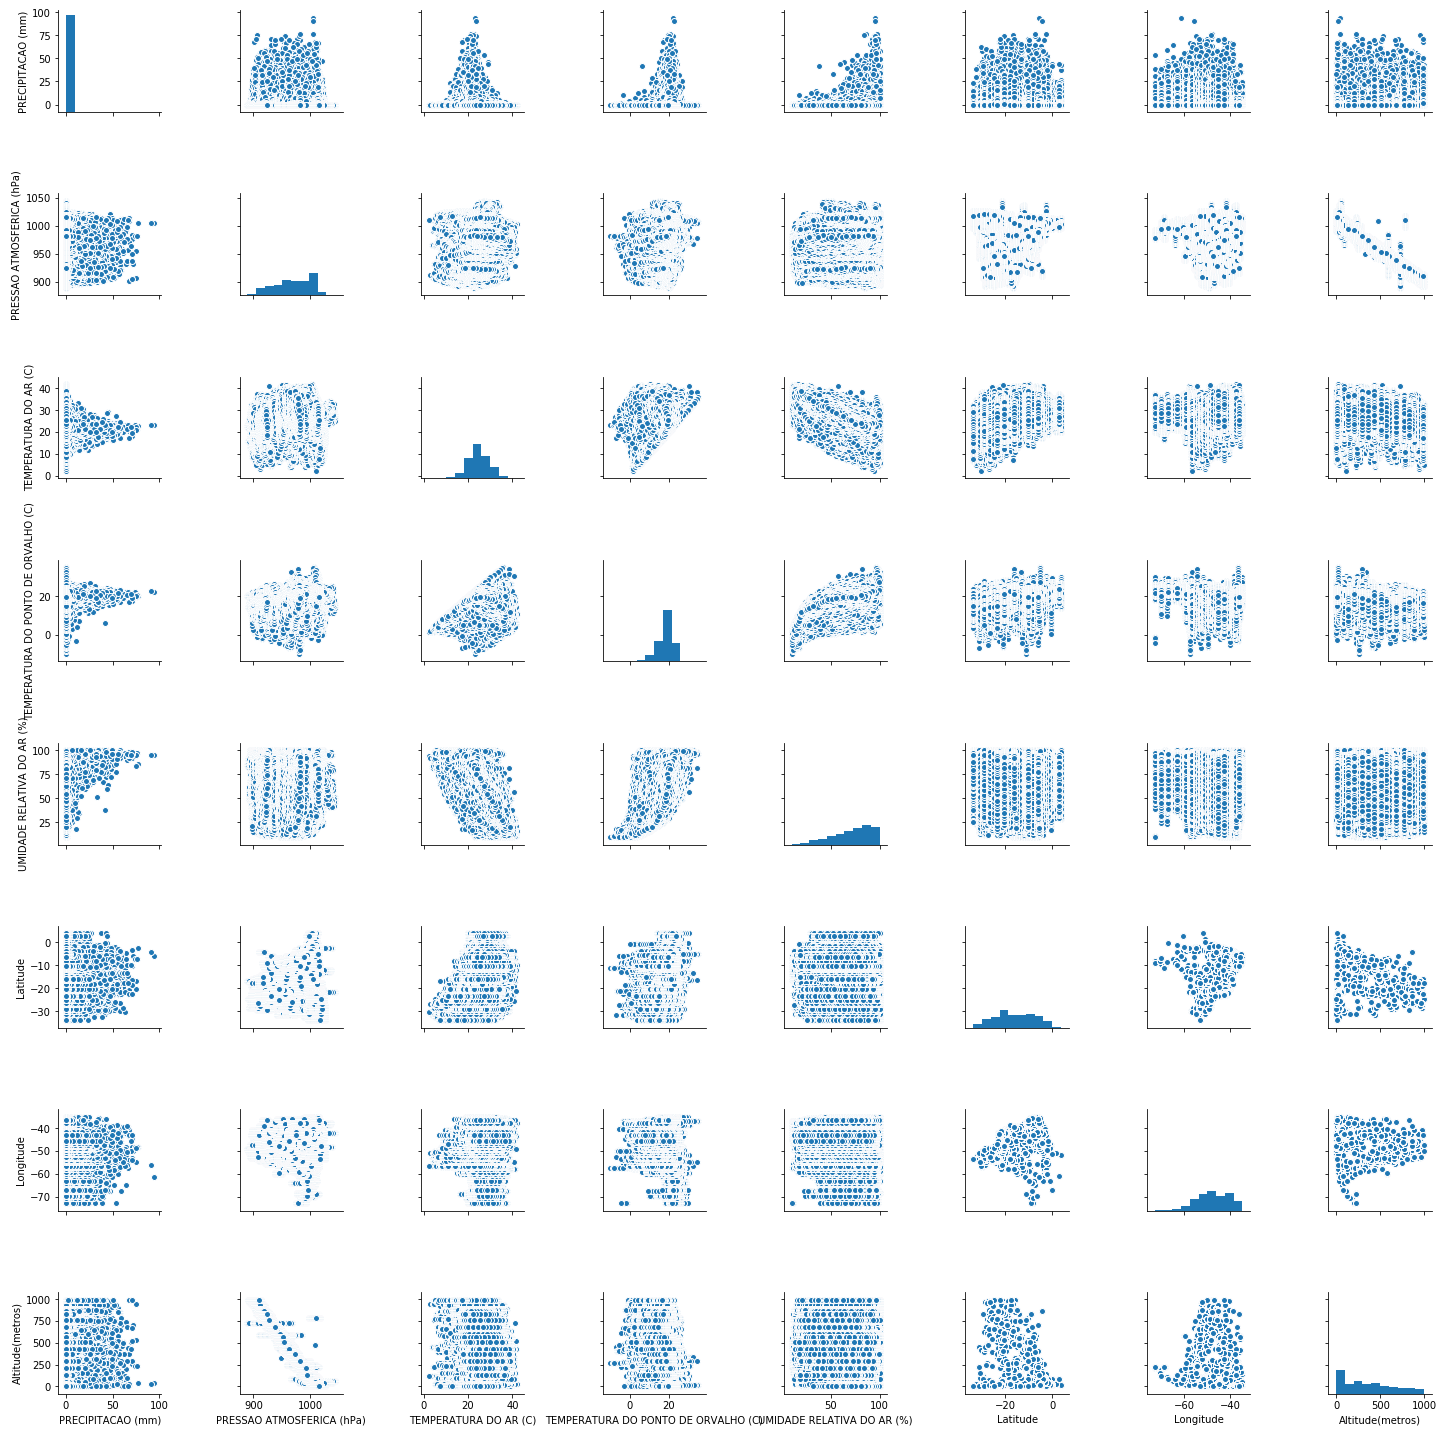

In [49]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(11)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(6)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     11   
1             185.0     81963.0    1       1 -9.358353 -69.926257     11   
2             185.0     81963.0    1       2 -9.358353 -69.926257     11   
3             185.0     81963.0    1       3 -9.358353 -69.926257     11   
4             185.0     81963.0    1       4 -9.358353 -69.926257     11   
5             185.0     81963.0    1       5 -9.358353 -69.926257     11   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   
5  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      990.2   ...                      22.4   
1                      991.3   ...                      22.0   
2                      991.4   ...                      21.7   
3                      991.1   ...                      21.7   
4                      991.0   ...                      21.6   
5                      989.7   ...                      21.3   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        21.4   
1                                        21.4   
2                                        21.1   
3                                        21.2   
4                                        21.1   
5                                        21.0   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.2                        93.0   
1                                        21.0                        94.0   
2                                        20.9                        95.0   
3                                        20.9                        95.0   
4                                        20.8                        96.0   
5                                        20.6                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               93.0                               90.0  2008   
1                               94.0                               92.0  2008   
2                               95.0                               94.0  2008   
3                               96.0                               95.0  2008   
4                               96.0                               95.0  2008   
5                               96.0                               95.0  2008   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  
5  Parque Estadual Chandless    Acre   Norte  

[6 rows x 25 columns]

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  15.990241  11.494186   
Acaraú-A360                      67.0     81755.0  15.500000  11.500000   
Afonso Cláudio-A657             507.0     86827.0  15.076492  11.680844   
Aimorés-A534                    288.0     86803.0  15.484635  11.516149   
Alegre-A617                     129.0     86828.0  15.176487  11.490946   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288   11.0           0.252533   
Acaraú-A360          -3.121067 -40.087288   11.0           0.004643   
Afonso Cláudio-A657 -20.104194 -41.106861   11.0           0.244576   
Aimorés-A534        -19.532768 -41.090801   11.0           0.211477   
Alegre-A617         -20.750412 -41.488852   11.0           0.302731   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1010.685797   
Acaraú-A360                        1002.862222   
Afonso Cláudio-A657                 955.174514   
Aimorés-A534                        985.025886   
Alegre-A617                         997.499325   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1010.953924     ...        
Acaraú-A360                               1003.134702     ...        
Afonso Cláudio-A657                        955.444082     ...        
Aimorés-A534                               985.309972     ...        
Alegre-A617                                997.780095     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    25.192587   
Acaraú-A360                      27.300992   
Afonso Cláudio-A657              23.124596   
Aimorés-A534                     24.817168   
Alegre-A617                      24.752544   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  21.930419   
Acaraú-A360                                    20.663611   
Afonso Cláudio-A657                            16.941873   
Aimorés-A534                                   18.766855   
Alegre-A617                                    19.195085   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     25.463144               24.924273   
Acaraú-A360                       27.968056               26.703353   
Afonso Cláudio-A657               23.757732               22.542071   
Aimorés-A534                      25.420430               24.265350   
Alegre-A617                       25.338517               24.210822   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.261732   
Acaraú-A360                                           21.088988   
Afonso Cláudio-A657                                   17.484273   
Aimorés-A534                                          19.266792   
Alegre-A617                                           19.722291   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         21.598194   
Acaraú-A360                                           20.227679   
Afonso Cláudio-A657                                   16.459149   
Aimorés-A534                                          18.290640   
Alegre-A617                              

In [4]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_11_mean.csv')

In [5]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            459.0    364.728020   283.034068   
Codigo OMM                                  459.0  85204.355120  2323.906472   
Day                                         459.0     15.484228     0.694570   
H(UTC)                                      459.0     11.542632     0.556821   
Latitude                                    459.0    -15.372818     8.267324   
Longitude                                   459.0    -48.014903     7.255276   
Month                                       459.0     11.000000     0.000000   
PRECIPITACAO (mm)                           459.0      0.184631     0.105958   
PRESSAO ATMOSFERICA (hPa)                   459.0    969.885133    31.110715   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            459.0    969.944415    31.338606   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            459.0    969.346101    31.326944   
TEMPERATURA DO AR (C)                       459.0     24.944842     2.679654   
TEMPERATURA DO PONTO DE ORVALHO (C)         459.0     18.658136     2.533228   
TEMPERATURA MAXIMA (C)                      459.0     25.583118     2.698717   
TEMPERATURA MINIMA (C)                      459.0     24.345709     2.663624   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  459.0     19.204166     2.496933   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  459.0     18.136198     2.574007   
UMIDADE RELATIVA DO AR (%)                  459.0     71.554024     8.876729   
UMIDADE RELATIVA DO MAXIMA AR (%)           459.0     74.353495     8.744390   
UMIDADE RELATIVA DO MINIMA AR (%)           459.0     68.578776     8.879375   
Year                                        459.0   2011.144578     1.223185   
Precipitação Acum.(mm)                      459.0    125.424311    72.704462   

                                                     min           25%  \
Altitude(metros)                                1.161000    105.500000   
Codigo OMM                                  81609.000000  81950.500000   
Day                                             2.000000     15.446692   
H(UTC)                                          0.000000     11.500000   
Latitude                                      -33.742297    -21.917960   
Longitude                                     -72.786778    -52.947681   
Month                                          11.000000     11.000000   
PRECIPITACAO (mm)                               0.000000      0.101004   
PRESSAO ATMOSFERICA (hPa)                     901.802811    948.560477   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              886.100000    948.766735   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              885.400000    948.196881   
TEMPERATURA DO AR (C)                          17.529691     23.375919   
TEMPERATURA DO PONTO DE ORVALHO (C)            12.920065     16.871342   
TEMPERATURA MAXIMA (C)                         18.131706     24.014131   
TEMPERATURA MINIMA (C)                         16.943966     22.775846   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     13.462721     17.406219   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     12.372500     16.306796   
UMIDADE RELATIVA DO AR (%)                     38.376389     68.106220   
UMIDADE RELATIVA DO MAXIMA AR (%)              40.943056     71.176838   
UMIDADE RELATIVA DO MINIMA AR (%)              35.979167     64.988938   
Year                                         2004.000000   2010.601246   
Precipitação Acum.(mm)                          0.000000     67.325000   

                                                     50%           75%  \
Altitude(metros)                              313.000000    555.500000   
Codigo OMM                                  86711.000000  86854.500000   
Day                                            15.500000     15.613861   
H(UTC)                                         11.513941     11.591346   
Latitude                                      -15.300159     -8.506776   
Longitude                                     -48.201231

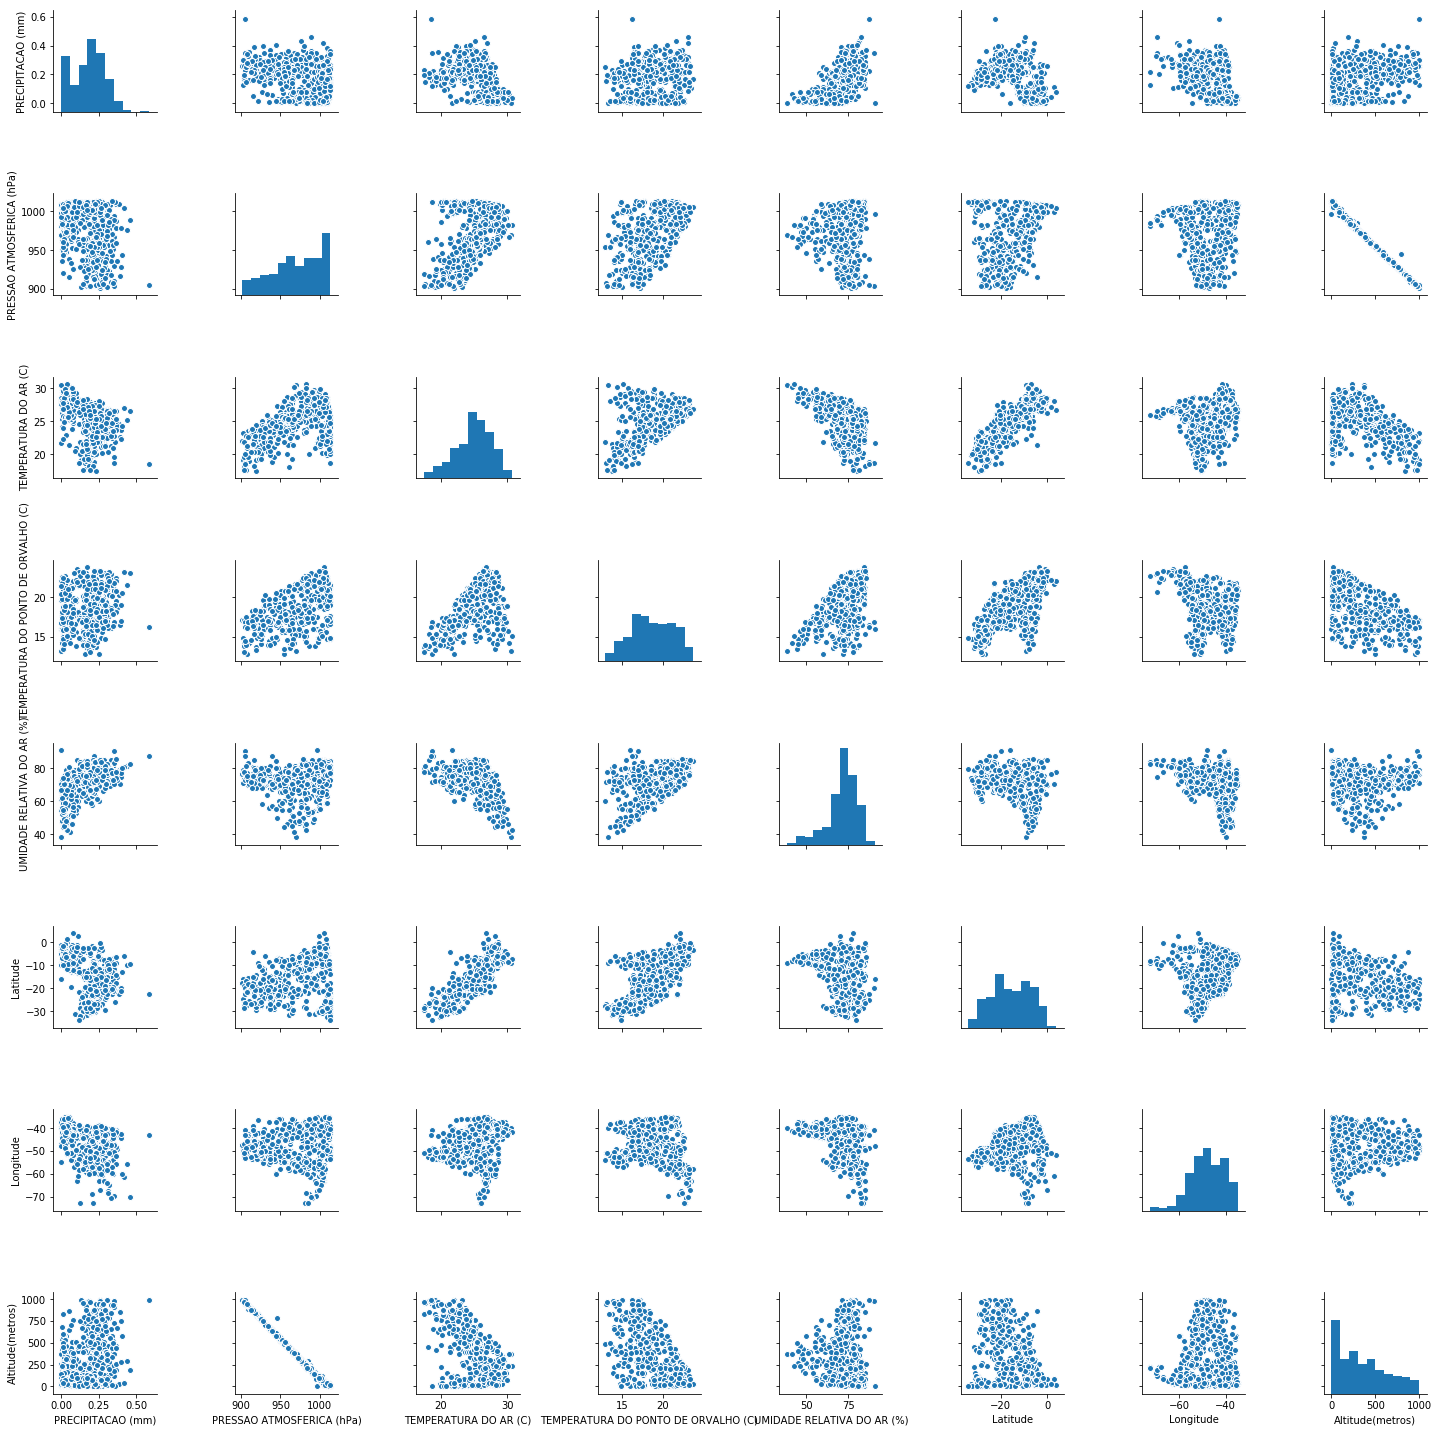

In [52]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [53]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [54]:
from sklearn.model_selection import train_test_split

X_ur_train, X_ur_test, y_ur_train, y_ur_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_ur_train)
X_ur_train = scaler_x.transform(X_ur_train)
X_ur_test  = scaler_x.transform(X_ur_test)

scaler_y.fit(y_ur_train)
y_ur_train = scaler_y.transform(y_ur_train)
y_ur_test  = scaler_y.transform(y_ur_test)

In [56]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_ur_train,y_ur_train.ravel())
y_ur_pred = mlp.predict(X_ur_test)


In [57]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))

Variance: 0.9043082759114149
Erro absoluto medio: 2.354020905384639
Erro quadrado medio: 7.982624899290715
Erro absoluto mediano: 2.128676912700712
R2 Score: 0.9032600198103831


In [58]:
errors=abs(scaler_y.inverse_transform(y_ur_test).ravel()-scaler_y.inverse_transform([y_ur_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.026666339804677364 	MAX: 6.846876563797402 	MEAN: 2.354020905384639	Std: 1.5624373511609357


In [59]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_ur_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_ur_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
38   38.376389  41.689512
28   46.870898  49.053855
64   47.102778  50.669013
25   48.268056  50.725255
101  47.701867  50.915201

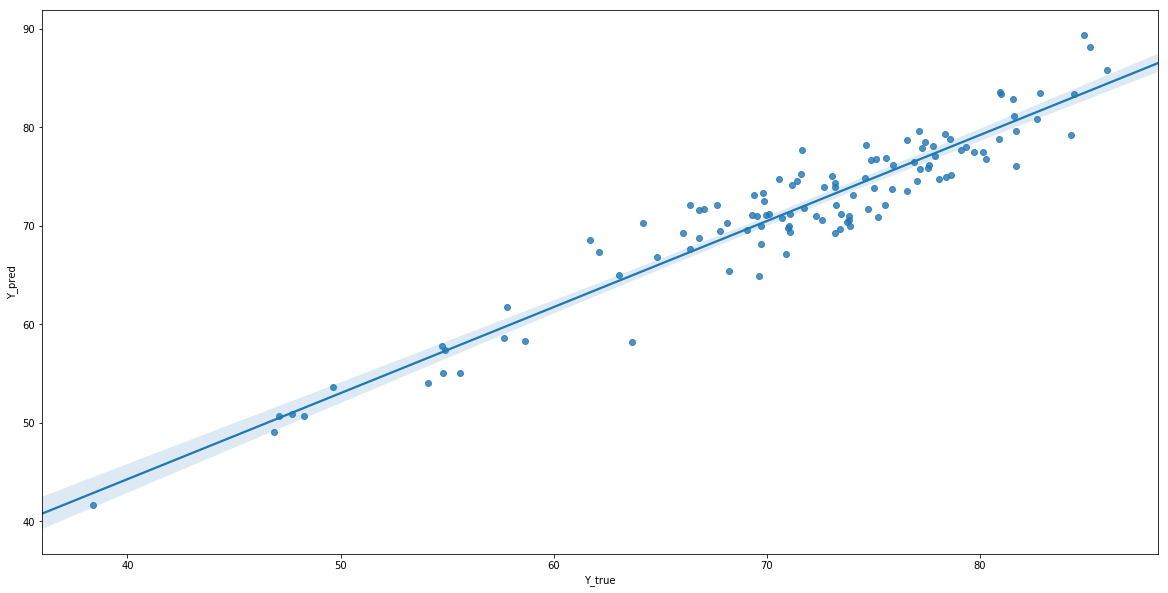

In [60]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

In [61]:
target_tmin = ['TEMPERATURA MINIMA (C)']
features_tmin = data_mean.columns.tolist()
features_tmin.remove('Day')
features_tmin.remove('Month')
features_tmin.remove('Codigo OMM')
features_tmin.remove('Year')
features_tmin.remove('H(UTC)')
features_tmin.remove('UMIDADE RELATIVA DO AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_tmin.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO AR (C)')
features_tmin.remove('TEMPERATURA MAXIMA (C)')
features_tmin.remove('TEMPERATURA MINIMA (C)')
features_tmin.remove('PRECIPITACAO (mm)')
features_tmin.remove('PRESSAO ATMOSFERICA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')
features_tmin

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

In [62]:
from sklearn.model_selection import train_test_split

X_tmin_train, X_tmin_test, y_tmin_train, y_tmin_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_tmin_train)
X_tmin_train = scaler_x.transform(X_tmin_train)
X_tmin_test  = scaler_x.transform(X_tmin_test)

scaler_y.fit(y_tmin_train)
y_tmin_train = scaler_y.transform(y_tmin_train)
y_tmin_test  = scaler_y.transform(y_tmin_test)

In [69]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_tmin_train,y_tmin_train.ravel())
y_tmin_pred = mlp.predict(X_tmin_test)


In [70]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))

Variance: 0.8714191230528485
Erro absoluto medio: 2.331378510267016
Erro quadrado medio: 10.415827604642743
Erro absoluto mediano: 1.7045133917533235
R2 Score: 0.8595758888599717


In [71]:
errors=abs(scaler_y.inverse_transform(y_tmin_test).ravel()-scaler_y.inverse_transform([y_tmin_pred,]))
print('Error(tmin_true - tmin_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(tmin_true - tmin_pred)
MIN: 0.010700293692707419 	MAX: 16.64825903413258 	MEAN: 2.331378510267016	Std: 2.2317037990082573


In [72]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_tmin_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_tmin_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
91  44.524991  49.502234
29  48.268056  50.631568
27  47.102778  51.071370
67  45.140496  52.229386
52  51.892485  52.229859

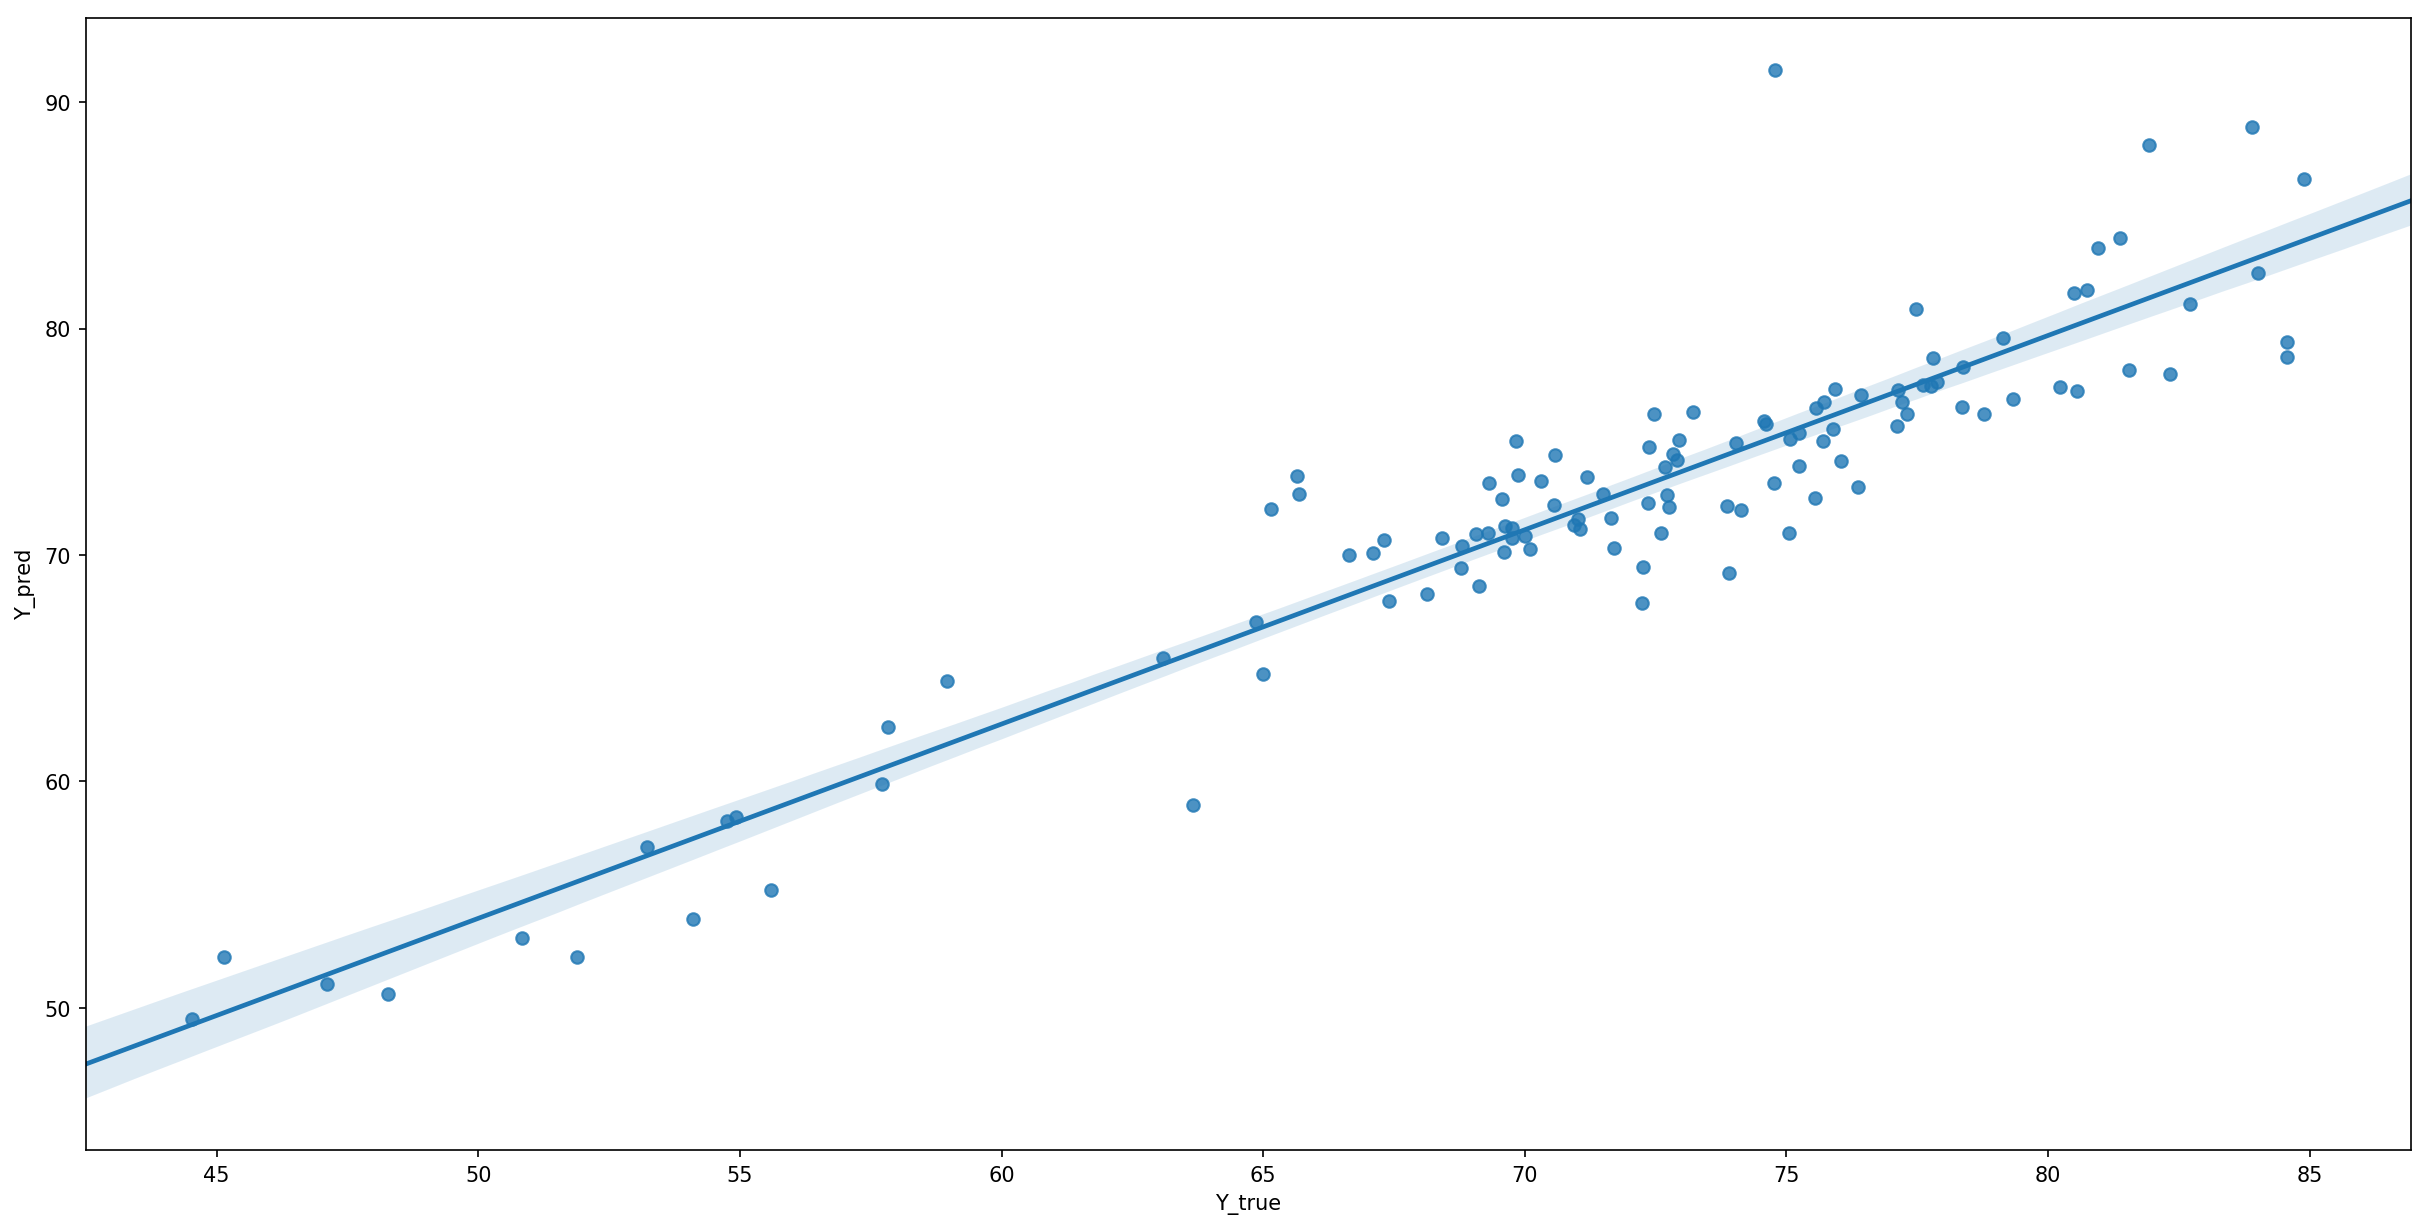

In [73]:
fig,ax = plt.subplots(figsize=(20,10),dpi=150)
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)